In [157]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn import mixture
from sklearn.preprocessing import MultiLabelBinarizer

import matplotlib.pyplot as plt

mlb = MultiLabelBinarizer()

from functools import reduce
import numpy as np
import pandas as pd
import random
import math

movies_data = pd.read_csv('C:\\Users\\multicampus\\BigdataPrac\\data_movies.dat', sep='::', names=['movie_id', 'title', 'genres'], engine='python')
ratings_data = pd.read_csv('C:\\Users\\multicampus\\BigdataPrac\\data_ratings.dat', sep='::', names=['user_id', 'movie_id', 'rating', 'timestamp'], engine='python')
users_data = pd.read_csv('C:\\Users\\multicampus\\BigdataPrac\\data_users.dat', sep='::', names=['user_id', 'gender', 'age', 'occupation', 'zip_code'], engine='python')

In [158]:
movies_data.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [159]:
ratings_data.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [160]:
users_data.head()

,user_id,gender,age,occupation,zip_code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [161]:
user_cnt = users_data['user_id'].count()

In [162]:
user = pd.DataFrame(users_data.drop('zip_code', axis=1))

In [163]:
user_userId = pd.DataFrame(user['user_id'], columns = ['user_id'])
# user_userId

In [164]:
user = user.drop('user_id', axis=1)

In [165]:
user = pd.get_dummies(user, columns=["gender", "age", "occupation"], prefix=["gender", "age", "occupation"])

In [166]:
user

,gender_F,gender_M,age_1,age_18,age_25,age_35,age_45,age_50,age_56,occupation_0,...,occupation_11,occupation_12,occupation_13,occupation_14,occupation_15,occupation_16,occupation_17,occupation_18,occupation_19,occupation_20
0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6035,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6036,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6037,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6038,1,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [28]:
Sum_of_squared_distances = []

K = range(1, 15)

for k in K:
  km = KMeans(n_clusters=k)
  km = km.fit(user.values)
  Sum_of_squared_distances.append(km.inertia_)

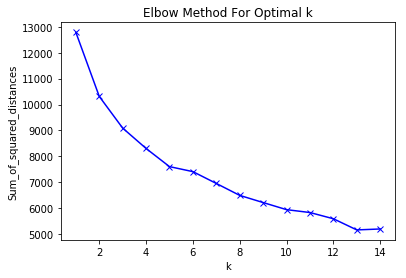

In [29]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [167]:
model = KMeans(n_clusters=5)
model.fit(user.values) # ndarray 형식으로 보내야함

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [168]:
df_kmeans = pd.DataFrame(model.labels_, columns = ['KMeans'])

In [169]:
df_kmeans.head()

,KMeans
0,2
1,0
2,1
3,4
4,1


In [170]:
user_userId = user_userId.join(df_kmeans)

In [171]:
user_userId['KMeans'].value_counts()

2    1709
0    1577
1    1538
3     855
4     361
Name: KMeans, dtype: int64

### EM

In [172]:
model_Em = mixture.GaussianMixture(n_components = 5, covariance_type='full')

In [173]:
user_userId['Em'] = model_Em.fit_predict(user.values)

In [174]:
user_userId

,user_id,KMeans,Em
0,1,2,0
1,2,0,1
2,3,1,1
3,4,4,2
4,5,1,1
...,...,...,...
6035,6036,2,4
6036,6037,2,0
6037,6038,2,0
6038,6039,2,0


### Hierarchical Clustering

In [175]:
model_hc = AgglomerativeClustering(n_clusters = 5, linkage = 'ward')
model_hc.fit(user.values)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=5,
                        pooling_func='deprecated')

In [181]:
# from scipy.cluster.hierarchy import linkage, dendrogram

# z = linkage(user, 'ward')
# z

# dendrogram(z)

In [177]:
df_hc = pd.DataFrame(model_hc.labels_, columns = ['HC'])

In [178]:
df_hc.head()

,HC
0,1
1,1
2,2
3,1
4,2


In [23]:
user_userId = user_userId.join(df_hc)

In [179]:
user_final = user_userId

In [180]:
user_final

,user_id,KMeans,Em
0,1,2,0
1,2,0,1
2,3,1,1
3,4,4,2
4,5,1,1
...,...,...,...
6035,6036,2,4
6036,6037,2,0
6037,6038,2,0
6038,6039,2,0


In [68]:
# pd.DataFrame(user_final).to_csv("user_final.csv", mode='w')

In [69]:
user_final

,user_id,KMeans,Em,HC
0,1,1,1,1
1,2,0,0,1
2,3,2,2,2
3,4,0,4,1
4,5,2,2,2
...,...,...,...,...
6035,6036,1,1,0
6036,6037,1,1,0
6037,6038,1,1,0
6038,6039,1,1,0


In [78]:
user_final = pd.merge(user_final, users_data, on='user_id')

In [25]:
# user_final = pd.merge(user_final, ratings_data, on='user_id')

In [182]:
user_final

,user_id,KMeans,Em
0,1,2,0
1,2,0,1
2,3,1,1
3,4,4,2
4,5,1,1
...,...,...,...
6035,6036,2,4
6036,6037,2,0
6037,6038,2,0
6038,6039,2,0


In [26]:
# user_final

,user_id,KMeans,Em,HC,movie_id,rating,timestamp
0,1,3,0,1,1193,5,978300760
1,1,3,0,1,661,3,978302109
2,1,3,0,1,914,3,978301968
3,1,3,0,1,3408,4,978300275
4,1,3,0,1,2355,5,978824291
...,...,...,...,...,...,...,...
1000204,6040,0,1,2,1091,1,956716541
1000205,6040,0,1,2,1094,5,956704887
1000206,6040,0,1,2,562,5,956704746
1000207,6040,0,1,2,1096,4,956715648


## Extract

In [183]:
df_same_user = pd.DataFrame()
df_same_user['user_id'] = np.arange(1, user_cnt+1)
df_same_user['same_user'] = pd.Series(list() for _ in range(user_cnt))

In [184]:
df_same_user

,user_id,same_user
0,1,[]
1,2,[]
2,3,[]
3,4,[]
4,5,[]
...,...,...
6035,6036,[]
6036,6037,[]
6037,6038,[]
6038,6039,[]


In [185]:
cluster_method = 'KMeans'
# cluster_method = 'HC'
# cluster_method = 'EM'

In [186]:
if cluster_method == 'KMeans':
    user_list = user_final[user_final.KMeans==user_clust]
elif cluster_method == 'Em':
    user_list = user_final[user_final.Em==user_clust]
elif cluster_method == 'HC':
    user_list = user_final[user_final.HC==user_clust]

In [187]:
user_list

,user_id,KMeans,Em
2,3,1,1
4,5,1,1
7,8,1,1
8,9,1,1
11,12,1,1
...,...,...,...
6022,6023,1,1
6023,6024,1,1
6029,6030,1,1
6033,6034,1,1


In [188]:
user_list.max()

user_id    6040
KMeans        1
Em            2
dtype: int64

In [89]:
user_final

,user_id,KMeans,gender,age,occupation,zip_code
0,1,3,F,1,10,48067
1,2,0,M,56,16,70072
2,3,1,M,25,15,55117
3,4,0,M,45,7,02460
4,5,1,M,25,20,55455
...,...,...,...,...,...,...
6035,6036,3,F,25,15,32603
6036,6037,3,F,45,1,76006
6037,6038,3,F,56,1,14706
6038,6039,3,F,45,0,01060


In [95]:
k = 5

In [147]:
cluster_info = pd.DataFrame()
cluster_info['cluster_num'] = np.arange(k)
cluster_info['max_cnt_gender'] = ''
cluster_info['max_cnt_age'] = ''
cluster_info['max_cnt_occ'] = ''

In [154]:
for i in range(k):
    temp = user_final[user_final.KMeans==i]
    cluster_info['max_cnt_gender'][i] = temp.max().gender
    cluster_info['max_cnt_age'][i] = temp.max().age
    cluster_info['max_cnt_occ'][i] = temp.max().occupation

M
M
M
F
M


c:\program files\python35\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
c:\program files\python35\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\program files\python35\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [155]:
cluster_info

,cluster_num,max_cnt_gender,max_cnt_age,max_cnt_occ
0,0,M,56,20
1,1,M,25,20
2,2,M,18,20
3,3,F,56,20
4,4,M,35,20


In [41]:
for i in range(1, user_cnt):
    userId = i
    user_clust = user_final[user_final.user_id==userId][cluster_method].values[0]
    same_cluster_user_list = user_list.user_id.values
    same_cluster_user_list = list(same_cluster_user_list)
    if userId in same_cluster_user_list:
        del same_cluster_user_list[same_cluster_user_list.index(userId)]
    same_cluster_user_list = np.random.choice(same_cluster_user_list, 3)
    for j in same_cluster_user_list:
        df_same_user[df_same_user.user_id==userId].same_user.values[0].append(j)

In [42]:
df_same_user

,user_id,same_user
0,1,"[4419, 184, 5247]"
1,2,"[3831, 1387, 1756]"
2,3,"[3524, 119, 2997]"
3,4,"[3751, 6, 2874]"
4,5,"[5812, 5683, 3831]"
...,...,...
6035,6036,"[4214, 2073, 5039]"
6036,6037,"[5334, 2427, 4781]"
6037,6038,"[3127, 1386, 379]"
6038,6039,"[3946, 2548, 467]"


In [172]:
pd.DataFrame(df_same_user).to_csv("df_same_user.csv", mode='w')

In [70]:
userId = int(input("user 입력 : "))

user 입력 : 1


In [71]:
clust_method = input("method 입력(KMeans, Em, HC 중 하나) : ")

method 입력(KMeans, Em, HC 중 하나) : KMeans


In [89]:
user_clust = user_final[user_final.user_id==userId][clust_method].values[0]
user_clust

1

In [98]:
if clust_method == 'KMeans':
    user_list = user_final[user_final.KMeans==user_clust]
elif clust_method == 'Em':
    user_list = user_final[user_final.Em==user_clust]
elif clust_method == 'HC':
    user_list = user_final[user_final.HC==user_clust]

In [99]:
same_cluster_user_list = user_list.user_id.values

In [100]:
same_cluster_user_list

array([   1,    6,   10, ..., 6037, 6038, 6039], dtype=int64)

In [101]:
same_cluster_user_list = list(same_cluster_user_list)

In [103]:
same_cluster_user_list.index(userId)

0

In [104]:
del same_cluster_user_list[same_cluster_user_list.index(userId)]

In [173]:
# same_cluster_user_list

In [106]:
np.random.choice(same_cluster_user_list, 3)

array([4659, 2390,   92], dtype=int64)

In [87]:
same_cluster_user_list = np.delete(same_cluster_user_list, input_user)

In [88]:
same_cluster_user_list

array([   1,   10,   11, ..., 6037, 6038, 6039], dtype=int64)

In [29]:
same_clust_user = pd.merge(user_list, users_data, on = 'user_id')
same_clust_user

,user_id,KMeans,Em,HC,movie_id,rating,timestamp,gender,age,occupation,zip_code
0,21,4,0,3,2987,3,978139382,M,18,16,99353
1,21,4,0,3,2700,5,978139382,M,18,16,99353
2,21,4,0,3,2701,3,978138933,M,18,16,99353
3,21,4,0,3,585,3,978138933,M,18,16,99353
4,21,4,0,3,588,3,978139423,M,18,16,99353
...,...,...,...,...,...,...,...,...,...,...,...
138104,6028,4,0,3,861,4,956723503,M,18,4,94133
138105,6028,4,0,3,165,4,956723393,M,18,4,94133
138106,6028,4,0,3,170,2,956723442,M,18,4,94133
138107,6028,4,0,3,1792,4,956722988,M,18,4,94133
